<a href="https://colab.research.google.com/github/vishnuvarshith81/smartspray/blob/main/PEST_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Rizpah/'


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import drive


In [ ]:
# Define dataset paths
dataset_path = '/content/drive/MyDrive/Rizpah/'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

In [ ]:

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:

# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4409 images belonging to 12 classes.
Found 1111 images belonging to 12 classes.


In [ ]:

# Load MobileNetV2 pre-trained model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for pest detection
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# Train the model (fewer epochs to save time)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  # Reduced for faster training
    verbose=1
)

# Save trained model
model.save('/content/drive/MyDrive/Rizpah/pest_detection_model.h5')

# Evaluate model performance
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 1913s 13s/step - accuracy: 0.2440 - loss: 2.3923 - val_accuracy: 0.6482 - val_loss: 1.3457
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 105s 478ms/step - accuracy: 0.5805 - loss: 1.4030 - val_accuracy: 0.7398 - val_loss: 0.9204
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 476ms/step - accuracy: 0.6619 - loss: 1.0833 - val_accuracy: 0.7942 - val_loss: 0.7580
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 483ms/step - accuracy: 0.7088 - loss: 0.9408 - val_accuracy: 0.8087 - val_loss: 0.6805
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 476ms/step - accuracy: 0.7473 - loss: 0.8098 - val_accuracy: 0.8268 - val_loss: 0.6100
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - accuracy: 0.7577 - loss: 0.7611 - val_accuracy: 0.8223 - val_loss: 0.5860
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 69s 479ms/step - accuracy: 0.7875 - loss: 0.6945 - val_accuracy: 0.8350 - val_loss: 0.5631
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 477ms/step - accuracy: 0.7887 - loss: 0.6628 - va

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8431 - loss: 0.5159
Test Accuracy: 83.77%


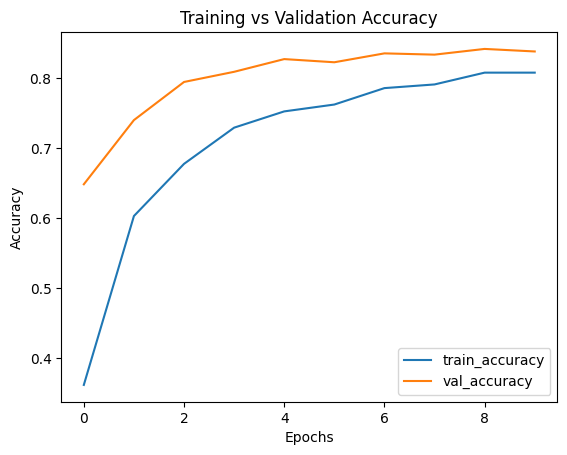

In [ ]:

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.models import load_model

In [ ]:
# Load the trained model
model_path = '/content/drive/MyDrive/Rizpah/pest_detection_model.h5'
model = load_model(model_path)

In [ ]:

# Load class labels from the train generator
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to get label names


Saving caterpillar.jpeg to caterpillar.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


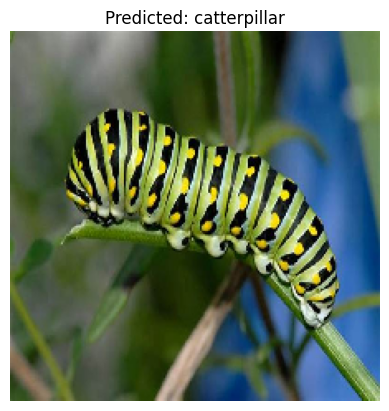

In [ ]:

# Function to preprocess and predict image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    class_name = class_labels[predicted_class]  # Get corresponding class name

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f'Predicted: {class_name}')
    plt.axis('off')
    plt.show()


# Upload an image from local machine
uploaded = files.upload()

# Predict each uploaded image
for filename in uploaded.keys():
    predict_image(filename)